# Introducción al Aprendizaje Supervisado - Clasificación (Parte III)

* Vista general de algunos métodos de clasificación.
* Enfoques prácticos para problemas comunes en AS.
* Ejemplo de sub-área clásica de IA: Natural Language Processing (NLP)
* Conclusiones del aprendizaje supervisado.

5to año - Ingeniería en Sistemas de Información

Facultad Regional Villa María

**Alumnos:** *Bollati Agustín - Genre Matías*

**Legajos:** *9234 - 9296*

### Trabajo Práctico 4

#### Ejercicios Básicos

1. Elegir dos modelos de clasificación y ajustar algún modelo de predicción en un dataset a elección, tal como venimos haciendo hasta ahora, mostrando para cada clasificador la tasa de aciertos junto con sus respectivos precision, recall y área bajo la curva. Explicar el paso a paso del análisis del dataset, su pre-procesamiento (si aplica), entrenamiento del modelo, su prueba de generalización y las mejoras realizadas para mejorar su tasa de aciertos, en el caso de haberlas realizado. Se alienta a la búsqueda de nuevos datasets y cómo implementar clasificadores, por lo que el dataset debe ser nuevo junto con al menos uno de los clasificadores seleccionados.

#### Ejercicios Complementarios

1. Elegir un dataset de algún concurso abierto de Kaggle, generar las predicciones con un algoritmo y participar del mismo enviando las predicciones. Referenciar el concurso y a su nombre de usuario (para su búsqueda en el leaderboard público). Comentar las decisiones particulares tomadas y el paso a paso del tuneo del algoritmo para llegar al mejor score posible (ejemplo: el uso de cierta normalización o cualquier particularidad que aplique, como el no uso de alguna técnica porque para el problema específico no está funcionando). Nota: Si bien se motiva a ver notebooks de otras personas en Kaggle, el algoritmo utilizado debe ser original (por algoritmo se hace referencia al paso a paso desde el pre-procesamiento de los datos hasta la generación final de las salidas). Se permite hacer el ejercicio básico y complementario juntos en un sólo ejercicio; si este es el caso, se permite utilizar un único dataset y no es necesario hacer el complementario con ambos modelos de clasificación y el ejercicio básico se considerará completo al emplear dos modelos de clasificación y comparar los mismos con las métricas mencionadas en dicho enunciado. 

#### Ejercicios Extra

Para este práctico, el puntaje del ejercicio extra se incluye dentro de los ejercicios complementarios.



Fecha de entrega: ** 12/06/2018 23:55**.

Nota: Como medida excepcional, y sólo para aquellos que decidan hacer el Ejercicio Complementario de este práctico y envíen a Kaggle una predicción, **se permite formar equipos de hasta dos personas y entregar un práctico válido para ambos (es decir con Ejercicios Básicos y Complementarios)**. Los grupos deben ser notificados en la clase Teórica del Miércoles 16/05. En caso de no optar por hacer el ejercicio complementario, la resolución de los ejercicios sigue siendo **individual** como hasta ahora.

### Trabajo Práctico 5

#### Ejercicios Básicos / Complementarios

1. Tomar el dataset (o una porción del dataset) seleccionado del ejercicio del Trabajo Práctico 4 y hacerle un PCA. Mostrar cómo está explicada la varianza en base a los distintos componentes principales.
2. Entrenar nuevamente uno de los clasificadores seleccionados para dicho ejercicio del TP4 para un conjunto de componentes principales que considere conveniente. Mostrar cuánto difiere la tasa de aciertos con respecto al modelo utilizado en el ejercicio anterior. (Nota: la cantidad de componentes utilizada debe ser menor a la cantidad de features del conjunto original).
3. Responder: bajo su criterio, ¿se justifica realizar la transformación de los features con PCA para el dataset seleccionado? Explicar por qué; en caso afirmativo, ¿cuántos componentes principales seleccionaría y por qué?

Aclaración: no es necesario que la solución final del ejercicio (ejemplo aquella que se envía a Kaggle) use una reducción de dimensionalidad con PCA, si así lo consideran más conveniente para el problema particular seleccionado.


#### Ejercicios Extra

1. Mostrar gráficamente cómo el primer y el segundo componente principal describen la varianza de los datos (hacer un gráfico similar al mostrado en esta clase con el Iris dataset pero para el nuevo dataset).


Fecha de entrega: **20/6/2018 23:55**

Nota: al estar este práctico muy relacionado con el Trabajo Práctico 4, si este fue realizado en grupo, se permite hacerlo con el mismo grupo con el que se realizó el TP4. También se permite entregar ambos prácticos en el mismo momento (bajo una misma entrega en el campus). Parte de la calificación de este TP estará relacionada con la del TP4.

## Índice
1. Introducción
2. Ingeniería de Features
3. Aplicación de Algoritmos de Aprendizaje Supervisado: SVM y Random Forest
4. Normalización de datos
5. PCA
6. Conclusión y cierre

## 1. Introducción
Para la realización de este trabajo práctico se seleccionó el dataset Titanic, ofrecido por Kaggle: https://www.kaggle.com/c/titanic.

El objetivo de este trabajo práctico es aprender a realizar un Análisis de Features básico y hacer uso de la utilización de gráficos para explicar las distintas decisiones que se fueron tomando a lo largo de todo el análisis para saber qué Features incluir en el modelo de entrenamiento. Una vez realizado el análisis, se llevará a cabo el entrenamiento del modelo y la aplicación de los algoritmos de clasificación Support Vector Marchine (SVM) y Random Forest, sin normalización y con normalización de datos. Se mostrará la tasa de aciertos de cada uno de ellos.

Por último, se hará uso de Principal Components Analysis (PCA), apuntando a reducir la dimensionalidad del dataset Titanic al considerar qué features explican mejor la varianza de los datos.


### Referencias
* Como guía para poder realizar la Ingeniería de Features, utilizamos la siguiete: https://www.kaggle.com/startupsci/titanic-data-science-solutions.

* Para poder realizar los gráficos, utilizamos: https://seaborn.pydata.org/.

* Para la aplicación del algoritmo SVM, utilizamos: http://scikit-learn.org/stable/modules/svm.html#svm

* Para la aplicación del algortimo Random Forest: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

* Para la aplicación de PCA, utilizamos: http://scikit-learn.org/stable/modules/decomposition.html#pca

## 2. Ingeniería de Features
La Ingeniería de Features consiste en realizar un análisis de datos del dataset para tomar decisiones acerca de si se deciden incluir ciertos features al modelo de entrenamiento para predecir los resultados.

Los workflows o etapas que se utilizarán para realizar este análisis de datos son los siguientes:

1. Correlación
2. Corrección
3. Creación
4. Completado
5. Clasificación

Las últimas tres etapas se harán simultáneamente.

In [1]:
# LIBRERÍAS UTILIZADAS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import scale
# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
# LEER ARCHIVOS
# Aquí debería insertar la dirección donde tiene guardado los archivos train.csv y test.csv
data_train = pd.read_csv('C:/Users/agus_/Downloads/train.csv')
data_test = pd.read_csv('C:/Users/agus_/Downloads/test.csv')

In [3]:
# Features originales del dataset
print(data_train.columns.values) # Features del conjunto de entrenamiento.
print("-"*35)
print(data_test.columns.values) # Features del conjunto de Test.

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
-----------------------------------
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


### 2.1 Correlación
En esta etapa, analizaremos los features que creemos que tienen correlación con Survived. Solo haremos esto con aquellas características que no tengan valores vacíos. En caso de tener una alta correlación, se incluirán en el modelo.

Para saber cuáles son las características que no tienen valores vacíos utilizamos:

In [4]:
# Información del dataset completo
data_train.info() # Muestra información del conjunto de entrenamiento.
print("-"*40)
data_test.info() # Muestra información del conjunto de Test.
print("-"*67)
data_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Podemos observar que del conjunto de entrenamiento Age, Cabin y Embarked no están completos; del conjunto de Test, podemos obervar que Age, Fare y Cab no están completos. Por lo tanto, se analizarán aquellos features non-null.

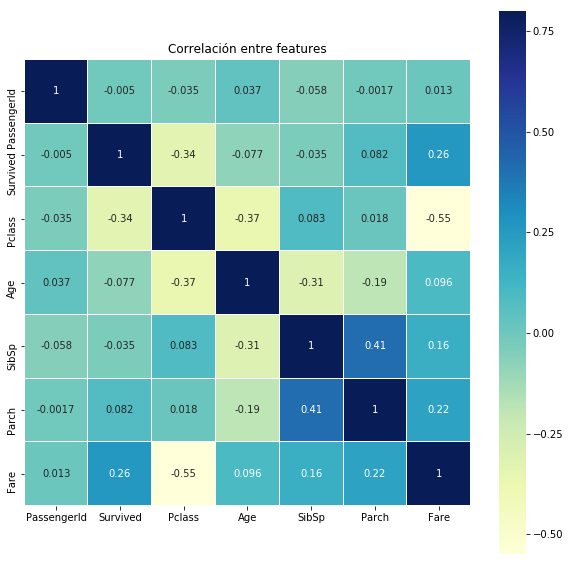

In [5]:
corr = data_train.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='YlGnBu', linecolor="white")
plt.title('Correlación entre features');

#### Pclass
A continuación se muestra la probabilidad de sobrevivencia de los pasajeros agrupados por Pclass:

In [6]:
data_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


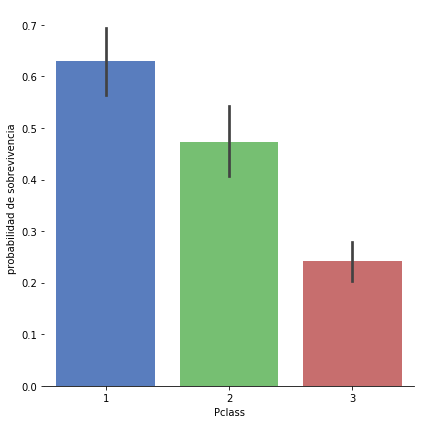

In [7]:
grid = sns.factorplot(x="Pclass", y="Survived", data=data_train, kind="bar", size=6 , palette="muted")
grid.despine(left=True)
grid = grid.set_ylabels("probabilidad de sobrevivencia")
# plt.show()

Observando la tabla junto con su correspondiente gráfico, podemos determinar que Pclass es significativo para incluirlo dentro del modelo.

#### Sex
A continuación se muestra la probabilidad de sobrevivencia de los pasajeros agrupados por Sex:

In [8]:
data_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


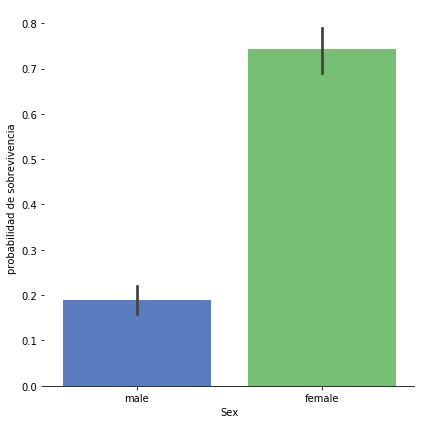

In [9]:
grid = sns.factorplot(x="Sex", y="Survived", data=data_train,kind="bar", size=6 , palette="muted")
grid.despine(left=True)
grid = grid.set_ylabels("probabilidad de sobrevivencia")
# plt.show()

Al observar los resultados, podemos confirmar que el sexo también influye considerablemente en si las personas sobreviven o no. Por lo tanto, Sex se incluirá en el modelo.

#### SibSp
A continuación se muestra la probabilidad de sobrevivencia de los pasajeros agrupados por SibSp:

In [10]:
data_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


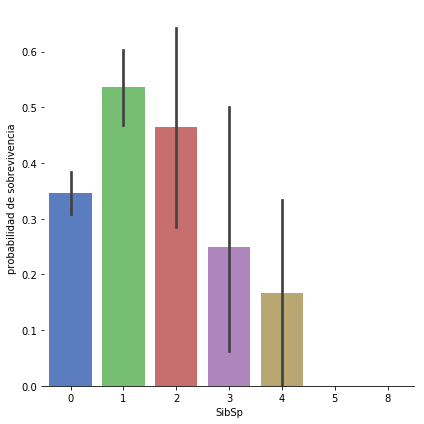

In [11]:
grid = sns.factorplot(x="SibSp", y="Survived", data=data_train, kind="bar", size=6 , palette="muted")
grid.despine(left=True)
grid = grid.set_ylabels("probabilidad de sobrevivencia")

Se decidió incluir SibSp dentro del modelo, debido a la correlación con Survived.

#### Parch
A continuación se muestra la probabilidad de sobrevivencia de los pasajeros agrupados por Parch:

In [12]:
data_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


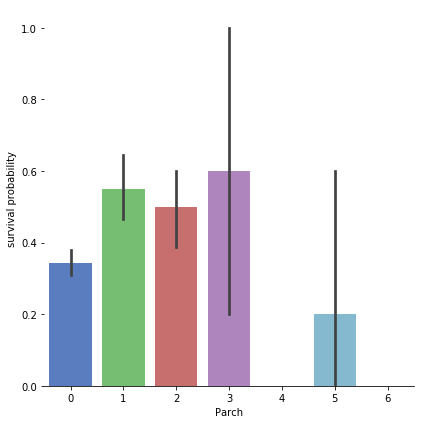

In [13]:
grid = sns.factorplot(x="Parch", y="Survived", data=data_train, kind="bar", size=6 , palette="muted")
grid.despine(left=True)
grid = grid.set_ylabels("survival probability")

Se decidió incluir Parch dentro del modelo, debido a la correlación con Survived.

Cabe aclarar que tanto SibSp como Parch definen si el pasajero tenía familiares a bordo.

#### Embarked
A continuación se muestra la probabilidad de sobrevivencia de los pasajeros agrupados por Embarked:

In [14]:
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


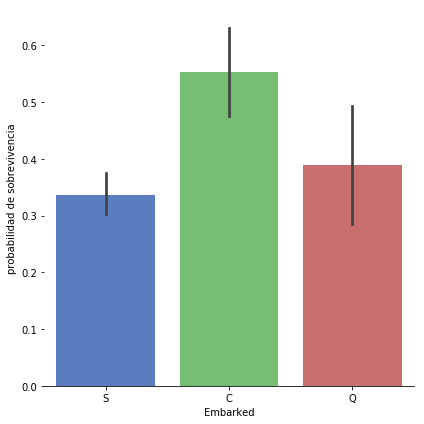

In [15]:
grid = sns.factorplot(x="Embarked", y="Survived", data=data_train, size=6, kind="bar", palette="muted")
grid.despine(left=True)
grid = grid.set_ylabels("probabilidad de sobrevivencia")

Embarked, significa aquellas personas que subieron en un puerto en particular. Se decide incluirlo dentro del modelo.

#### Age
A continuación se muestra una distribución junto con un histograma, indicando que las personas que menos sobreviven están entre 20 y 50 años. También se puede observar que los niños, tienen una alta probabilidad de que sobrevivan.

C:\Users\agus_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\agus_\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


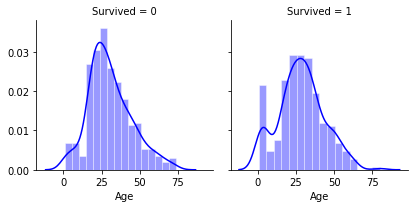

In [16]:
grid = sns.FacetGrid(data_train, col='Survived')
grid = grid.map(sns.distplot, 'Age', hist=True, hist_kws=dict(edgecolor="w"), color='blue')

### 2.2 Corrección
En esta etapa, se eliminarán aquellos features que se consideran totalmente irrelevantes para incluirlos en el modelo.

Asumimos que algunos features no aportan información para saber si la persona sobrevive o no. En este caso, son PassengerId, Ticket y Cabin.

In [17]:
data_train = data_train.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1)
print(data_train.columns.values)
print(data_train.shape)

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked']
(891, 9)


In [18]:
data_test = data_test.drop(['Ticket', 'Cabin'], axis=1)
print(data_test.columns.values)
print(data_test.shape)

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Fare'
 'Embarked']
(418, 9)


### 2.3 Creación, Completado y Clasificación
En esta etapa, se analizarán aquellos features que por si solos hacen que el modelo sea más complejo, pero agrupando esas características en una nueva, simplifica el modelo y ayuda a entenderlo aún más. Se analizará si es conveniente crear una nueva característica a partir de las existentes.

#### Title
Primero se combinará el dataset en uno solo, como si fueran dos listas. Luego, se recorrerán las listas buscando la catacterística Title y a través de una expresión regular, se extraerán dichas cadenas que contengan títulos dentro del nombre del pasajero.

Una vez hecho esto, se reemplazarán los títulos originales por títulos más fáciles de leer y entender.

In [19]:
dataset = [data_train, data_test]
for data in dataset:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand=False)

for data in dataset:
    data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 
                                           'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [20]:
data_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Other,0.347826
2,Mr,0.156673


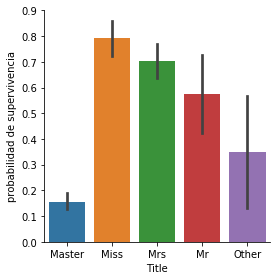

In [21]:
grid = sns.factorplot(x="Title", y="Survived", data=data_train, kind="bar")
grid = grid.set_xticklabels(["Master","Miss", "Mrs","Mr","Other"])
grid = grid.set_ylabels("probabilidad de supervivencia")

En el gráfico de barras anterior podemos observar que la probabilidad de sobrevivencia, dependiendo del título que posee el pasajero, es muy alta para las señoritas (Miss) y señoras (Mrs). Por lo tanto, ahora procedemos a realizar la creación de un nuevo feature llamado Title.

In [22]:
transformacion_de_titulos = {"Master": 1, "Miss": 2, "Mrs": 3, "Mr": 4, "Other": 5}
for data in dataset:
    data['Title'] = data['Title'].map(transformacion_de_titulos)
    data['Title'] = data['Title'].fillna(value=0) # fillna() ---> busca todos los valores NaN y los reemplaza por 0

data_train.head() # Muestra solo 5 filas por defecto

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,4


Ahora eliminamos la columna Name, ya que es reemplazada por Title:

In [23]:
data_train = data_train.drop(['Name'], axis=1)
data_test = data_test.drop(['Name'], axis=1)

#### Sex
Se creará un nuevo feature utilizando dummies variables con el la culumna sexo:

In [24]:
data_train = pd.get_dummies(data=data_train, columns=['Sex'])
data_train = data_train.drop(['Sex_male'], axis=1)
data_test = pd.get_dummies(data=data_test, columns=['Sex'])
data_test = data_test.drop(['Sex_male'], axis=1)

In [25]:
print(data_train.columns.values)
data_train.head()

['Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'
 'Sex_female']


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,0,3,22.0,1,0,7.2500,S,4,0
1,1,1,38.0,1,0,71.2833,C,3,1
2,1,3,26.0,0,0,7.9250,S,2,1
3,1,1,35.0,1,0,53.1000,S,3,1
4,0,3,35.0,0,0,8.0500,S,4,0


In [26]:
print(data_test.columns.values)
data_test.head()

['PassengerId' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare' 'Embarked' 'Title'
 'Sex_female']


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,892,3,34.5,0,0,7.8292,Q,4,0
1,893,3,47.0,1,0,7.0000,S,3,1
2,894,2,62.0,0,0,9.6875,Q,4,0
3,895,3,27.0,0,0,8.6625,S,4,0
4,896,3,22.0,1,1,12.2875,S,3,1


#### Age
Ahora lo que se hará es completar los valores Age que falten. Para ello se sumarán las edades de cada uno de los títulos de los pasajeros y luego se calculará la media.

Primero se recorrerá el conjunto de entrenamiento y luego el conjunto de test.

In [27]:
# Declaración de variables
sumaEdadMaster = 0.0
sumaEdadMr = 0.0
sumaEdadMiss = 0.0
sumaEdadMrs = 0.0
sumaEdadOther = 0.0
master = 0
miss = 0
mrs = 0
mr = 0
other = 0

# Conjunto de entrenamiento
for row in data_train.itertuples(index=True):
    if getattr(row, 'Title') == 1 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMaster = sumaEdadMaster + getattr(row, 'Age')
        master += 1
    if getattr(row, 'Title') == 2 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMiss = sumaEdadMiss + getattr(row, 'Age')
        miss += 1
    if getattr(row, 'Title') == 3 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMrs = sumaEdadMrs + getattr(row, 'Age')
        mrs += 1
    if getattr(row, 'Title') == 4 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMr = sumaEdadMr + getattr(row, 'Age')
        mr += 1
    if getattr(row, 'Title') == 5 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadOther = sumaEdadOther + getattr(row, 'Age')
        other += 1
        
# Conjunto de test
for row in data_test.itertuples(index=True):
    if getattr(row, 'Title') == 1 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMaster = sumaEdadMaster + getattr(row, 'Age')
        master += 1
    if getattr(row, 'Title') == 2 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMiss = sumaEdadMiss + getattr(row, 'Age')
        miss += 1
    if getattr(row, 'Title') == 3 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMrs = sumaEdadMrs + getattr(row, 'Age')
        mrs += 1
    if getattr(row, 'Title') == 4 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadMr = sumaEdadMr + getattr(row, 'Age')
        mr += 1
    if getattr(row, 'Title') == 5 and pd.isna(getattr(row, 'Age')) == False:
        sumaEdadOther = sumaEdadOther + getattr(row, 'Age')
        other += 1

Después de obtener la suma de cada uno, se obtiene la media aritmética para poder asignarle los valores a la edad y título correspondiente.

In [28]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
Title         891 non-null int64
Sex_female    891 non-null uint8
dtypes: float64(2), int64(5), object(1), uint8(1)
memory usage: 56.6+ KB


In [29]:
print("SUMA:", sumaEdadMaster, "CANT:", master)
media_master = sumaEdadMaster/master
print("MEDIA Master:", media_master)
print('-'*40)
print("SUMA:", sumaEdadMiss, "CANT:", miss)
media_miss = sumaEdadMiss/miss
print("MEDIA Miss:", media_miss)
print('-'*40)
print("SUMA", sumaEdadMrs, "CANT:", mrs)
media_mrs = sumaEdadMrs/mrs
print("MEDIA Mrs:", media_mrs)
print('-'*40)
print("SUMA:", sumaEdadMr, "CANT:", mr)
media_mr = sumaEdadMr/mr
print("MEDIA Mr:", media_mr)
print('-'*40)
print("SUMA:", sumaEdadOther, "CANT:", other)
media_other = sumaEdadOther/other
print("MEDIA Other:", media_other)
print('-'*40)
print("TOTAL:", master+miss+mrs+mr+other)

SUMA: 290.58000000000004 CANT: 53
MEDIA Master: 5.482641509433963
----------------------------------------
SUMA: 4648.59 CANT: 213
MEDIA Miss: 21.8243661971831
----------------------------------------
SUMA 6313.0 CANT: 171
MEDIA Mrs: 36.91812865497076
----------------------------------------
SUMA: 18738.5 CANT: 581
MEDIA Mr: 32.25215146299484
----------------------------------------
SUMA: 1265.0 CANT: 28
MEDIA Other: 45.17857142857143
----------------------------------------
TOTAL: 1046


In [30]:
# Se asignan los valores de la media para cada edad y título correspondiente, del conjunto de entrenamiento.
for row in data_train.itertuples(index=True):
    index, Survived, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female = row
    if getattr(row, 'Title') == 1 and pd.isna(getattr(row, 'Age')) == True:
        data_train.at[index ,'Age'] = media_master
    if getattr(row, 'Title') == 2 and pd.isna(getattr(row, 'Age')) == True:
        data_train.at[index, 'Age'] = media_miss
    if getattr(row, 'Title') == 3 and pd.isna(getattr(row, 'Age')) == True:
        data_train.at[index, 'Age'] = media_mrs
    if getattr(row, 'Title') == 4 and pd.isna(getattr(row, 'Age')) == True:
        data_train.at[index, 'Age'] = media_mr
    if getattr(row, 'Title') == 5 and pd.isna(getattr(row, 'Age')) == True:
        data_train.at[index, 'Age'] = media_other

In [31]:
# Convertir todos los valores del feature Age en números enteros. De float a int.
data_train['Age'] = data_train['Age'].astype(np.int64)

In [32]:
# Se asignan los valores de la media para edad y títlo correspondiente, del conjunto de test.
for row in data_test.itertuples(index=True):
    index, PassengerId, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female = row
    if getattr(row, 'Title') == 1 and pd.isna(getattr(row, 'Age')) == True:
        data_test.at[index, 'Age'] = media_master
    if getattr(row, 'Title') == 2 and pd.isna(getattr(row, 'Age')) == True:
        data_test.at[index, 'Age'] = media_miss
    if getattr(row, 'Title') == 3 and pd.isna(getattr(row, 'Age')) == True:
        data_test.at[index, 'Age'] = media_mrs
    if getattr(row, 'Title') == 4 and pd.isna(getattr(row, 'Age')) == True:
        data_test.at[index, 'Age'] = media_mr
    if getattr(row, 'Title') == 5 and pd.isna(getattr(row, 'Age')) == True:
        data_test.at[index, 'Age'] = media_other

In [33]:
# Convertir todos los valores del feature Age en números enteros. De float a int.
data_test['Age'] = data_test['Age'].astype(np.int64)

In [34]:
# Información del conjunto de entrenamiento
data_train.info()
data_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      889 non-null object
Title         891 non-null int64
Sex_female    891 non-null uint8
dtypes: float64(1), int64(6), object(1), uint8(1)
memory usage: 56.6+ KB


,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,0,3,22,1,0,7.2500,S,4,0
1,1,1,38,1,0,71.2833,C,3,1
2,1,3,26,0,0,7.9250,S,2,1
3,1,1,35,1,0,53.1000,S,3,1
4,0,3,35,0,0,8.0500,S,4,0


In [35]:
# Información del conjunto de test
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Title          418 non-null int64
Sex_female     418 non-null uint8
dtypes: float64(1), int64(6), object(1), uint8(1)
memory usage: 26.6+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,892,3,34,0,0,7.8292,Q,4,0
1,893,3,47,1,0,7.0000,S,3,1
2,894,2,62,0,0,9.6875,Q,4,0
3,895,3,27,0,0,8.6625,S,4,0
4,896,3,22,1,1,12.2875,S,3,1


In [36]:
# Dimensión del conjunto de entrenamiento
print(data_train.shape)
# Dimensión del conjunto de test
print(data_test.shape)

(891, 9)
(418, 9)


Ahora evaluaremos cómo es la probabilidad de sobrevivencia con un rango de edad determinado:

In [37]:
data_train['AgeRange'] = pd.cut(data_train['Age'], 8)
data_train[['AgeRange', 'Survived']].groupby(['AgeRange'], 
                                                   as_index=False).mean().sort_values(by='AgeRange', ascending=True)

,AgeRange,Survived
0,"(-0.08, 10.0]",0.588235
1,"(10.0, 20.0]",0.379310
2,"(20.0, 30.0]",0.397004
3,"(30.0, 40.0]",0.333333
4,"(40.0, 50.0]",0.388235
5,"(50.0, 60.0]",0.404762
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000


El rango de edad se dividió en 8, dado que las edades de los pasajeros del Titanic van desde 0 a 80 años. Como podemos ver en la tabla anterior, la probabilidad de sobrevienciamás alta es de los pasajeros bebés y niños, seguido por las personas entre 50 y 60 años.

Visto esto, se reemplazarán las edades por números del 0 al 7, para manejar números más chicos y más representativos.

In [38]:
data_train = data_train.drop(['AgeRange'], axis=1)

# Conjunto de entrenamiento
for row in data_train.itertuples(index=True):
    index, Survived, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female = row
    if getattr(row, 'Age') <= 10:
        data_train.at[index, 'Age'] = 0
    if getattr(row, 'Age') > 10 and getattr(row, 'Age') <= 20:
        data_train.at[index, 'Age'] = 1
    if getattr(row, 'Age') > 20 and getattr(row, 'Age') <= 30:
        data_train.at[index, 'Age'] = 2
    if getattr(row, 'Age') > 30 and getattr(row, 'Age') <= 40:
        data_train.at[index, 'Age'] = 3
    if getattr(row, 'Age') > 40 and getattr(row, 'Age') <= 50:
        data_train.at[index, 'Age'] = 4
    if getattr(row, 'Age') > 50 and getattr(row, 'Age') <= 60:
        data_train.at[index, 'Age'] = 5
    if getattr(row, 'Age') > 60 and getattr(row, 'Age') <= 70:
        data_train.at[index, 'Age'] = 6
    if getattr(row, 'Age') > 70:
        data_train.at[index, 'Age'] = 7

data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,0,3,2,1,0,7.2500,S,4,0
1,1,1,3,1,0,71.2833,C,3,1
2,1,3,2,0,0,7.9250,S,2,1
3,1,1,3,1,0,53.1000,S,3,1
4,0,3,3,0,0,8.0500,S,4,0


In [39]:
# Conjunto de test
for row in data_test.itertuples(index=True):
    index, PassengerId, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female = row
    if getattr(row, 'Age') <= 10:
        data_test.at[index, 'Age'] = 0
    if getattr(row, 'Age') > 10 and getattr(row, 'Age') <= 20:
        data_test.at[index, 'Age'] = 1
    if getattr(row, 'Age') > 20 and getattr(row, 'Age') <= 30:
        data_test.at[index, 'Age'] = 2
    if getattr(row, 'Age') > 30 and getattr(row, 'Age') <= 40:
        data_test.at[index, 'Age'] = 3
    if getattr(row, 'Age') > 40 and getattr(row, 'Age') <= 50:
        data_test.at[index, 'Age'] = 4
    if getattr(row, 'Age') > 50 and getattr(row, 'Age') <= 60:
        data_test.at[index, 'Age'] = 5
    if getattr(row, 'Age') > 60 and getattr(row, 'Age') <= 70:
        data_test.at[index, 'Age'] = 6
    if getattr(row, 'Age') > 70:
        data_test.at[index, 'Age'] = 7

data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,892,3,3,0,0,7.8292,Q,4,0
1,893,3,4,1,0,7.0000,S,3,1
2,894,2,6,0,0,9.6875,Q,4,0
3,895,3,2,0,0,8.6625,S,4,0
4,896,3,2,1,1,12.2875,S,3,1


#### Embarked
Otros de los features que necesitan ser completados con valores son los pasajeros que no tienen asignado ningún valor para Embarked. Es por eso que se recorrerá todo el conjunto de entrenamiento para calcular cuál es la cantidad máxima de pasajeros que embarcaron en el puerto S, Q y C.

In [40]:
embarked_C = 0
embarked_S = 0
embarked_Q = 0
for row in data_train.itertuples(index=True):
    if getattr(row, 'Embarked') == 'C' and pd.isnull(getattr(row, 'Embarked')) == False:
        embarked_C += 1
    if getattr(row, 'Embarked') == 'S' and pd.isna(getattr(row, 'Embarked')) == False:
        embarked_S += 1
    if getattr(row, 'Embarked') == 'Q' and pd.isna(getattr(row, 'Embarked')) == False:
        embarked_Q += 1

for row in data_test.itertuples(index=True):
    if getattr(row, 'Embarked') == 'C' and pd.isnull(getattr(row, 'Embarked')) == False:
        embarked_C += 1
    if getattr(row, 'Embarked') == 'S' and pd.isna(getattr(row, 'Embarked')) == False:
        embarked_S += 1
    if getattr(row, 'Embarked') == 'Q' and pd.isna(getattr(row, 'Embarked')) == False:
        embarked_Q += 1

print("Cantidad de pasajeros que embarcaron en C:", embarked_C)
print("Cantidad de pasajeros que embarcaron en S:", embarked_S)
print("Cantidad de pasajeros que embarcaron en Q:", embarked_Q)

Cantidad de pasajeros que embarcaron en C: 270
Cantidad de pasajeros que embarcaron en S: 914
Cantidad de pasajeros que embarcaron en Q: 123


Al observar que la mayoría de las personas embarcaron en el puerto S, se asignarán a las filas con valores faltantes.

In [41]:
for row in data_train.itertuples(index=True):
    index, Survived, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female = row
    if pd.isna(getattr(row, 'Embarked')) ==  True:
        data_train.at[index, 'Embarked'] = 'S'

Una vez hecho esto, se pasará a reemplazar los caracteres Q, S y C por números. El número 0 para S, 1 para Q y 2 para C:

In [42]:
dataset = [data_train, data_test]
for data in dataset:
    data['Embarked'] = data['Embarked'].replace(['S'], 0)
    data['Embarked'] = data['Embarked'].replace(['Q'], 1)
    data['Embarked'] = data['Embarked'].replace(['C'], 2)

In [43]:
# Conjunto de entrenamiento
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,0,3,2,1,0,7.2500,0,4,0
1,1,1,3,1,0,71.2833,2,3,1
2,1,3,2,0,0,7.9250,0,2,1
3,1,1,3,1,0,53.1000,0,3,1
4,0,3,3,0,0,8.0500,0,4,0


In [44]:
# Conjunto de test
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,892,3,3,0,0,7.8292,1,4,0
1,893,3,4,1,0,7.0000,0,3,1
2,894,2,6,0,0,9.6875,1,4,0
3,895,3,2,0,0,8.6625,0,4,0
4,896,3,2,1,1,12.2875,0,3,1


#### Fare
Se buscarán los valores que contengan nulos y se reemplazarán por la media.

In [45]:
data_test['Fare'].fillna(data_test['Fare'].dropna().mean(), inplace=True)
data_test.info()
data_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
Sex_female     418 non-null uint8
dtypes: float64(1), int64(7), uint8(1)
memory usage: 26.6 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,892,3,3,0,0,7.8292,1,4,0
1,893,3,4,1,0,7.0000,0,3,1
2,894,2,6,0,0,9.6875,1,4,0
3,895,3,2,0,0,8.6625,0,4,0
4,896,3,2,1,1,12.2875,0,3,1


Ahora se convertirá el tipo de dato float a int:

In [46]:
# Conversión de float a int del conjunto de entrenamiento
data_train['Fare'] = data_train['Fare'].astype(np.int64)
# Conversión de float a int del conjunto de test
data_test['Fare'] = data_test['Fare'].astype(np.int64)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
Sex_female     418 non-null uint8
dtypes: int64(8), uint8(1)
memory usage: 26.6 KB


Se determinará un rango de precios de pasajes (FareRange) para observar si es conveniente crear un nuevo feature en base a las probabilidades de sobrevivencia.

In [47]:
data_train['FareRange'] = pd.qcut(data_train['Fare'], 5, duplicates='drop')
data_train[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.001, 7.0]",0.215768
1,"(7.0, 10.0]",0.195122
2,"(10.0, 21.0]",0.426901
3,"(21.0, 39.0]",0.444444
4,"(39.0, 512.0]",0.642045


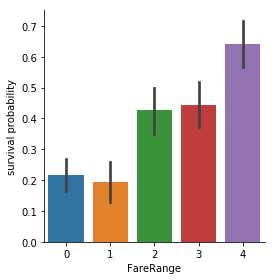

In [48]:
grid = sns.factorplot(x="FareRange", y="Survived", data=data_train, kind="bar")
grid = grid.set_xticklabels(["0", "1", "2", "3", "4"])
grid = grid.set_ylabels("survival probability")

Se dividió el rango de precios en 5 y, como podemos observar en el gráfico de barras, casi el 65% de los pasajeros que pagaron entre 39 y 512 dólares sobrevivieron. Pero se decide que no se incluirá dentro del modelo.

In [49]:
data_train = data_train.drop(['FareRange'], axis=1)

Como ya hemos hecho antes, ahora utilizaremos los rangos para reemplazarlos por valores enteros del 0 al 4.

In [50]:
# Conjunto de entrenamiento
for row in data_train.itertuples(index=True):
    index, Survived, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female = row
    if getattr(row, 'Fare') <= 7:
        data_train.at[index, 'Fare'] = 0
    if getattr(row, 'Fare') > 7 and getattr(row, 'Fare') <= 10:
        data_train.at[index, 'Fare'] = 1
    if getattr(row, 'Fare') > 10 and getattr(row, 'Fare') <= 21:
        data_train.at[index, 'Fare'] = 2
    if getattr(row, 'Fare') > 21 and getattr(row, 'Fare') <= 39:
        data_train.at[index, 'Fare'] = 3
    if getattr(row, 'Fare') > 39:
        data_train.at[index, 'Fare'] = 4

data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,0,3,2,1,0,0,0,4,0
1,1,1,3,1,0,4,2,3,1
2,1,3,2,0,0,0,0,2,1
3,1,1,3,1,0,4,0,3,1
4,0,3,3,0,0,1,0,4,0


In [51]:
# Conjunto de test
for row in data_test.itertuples(index=True):
    index, PassengerId, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female = row
    if getattr(row, 'Fare') <= 7:
        data_test.at[index, 'Fare'] = 0
    if getattr(row, 'Fare') > 7 and getattr(row, 'Fare') <= 10:
        data_test.at[index, 'Fare'] = 1
    if getattr(row, 'Fare') > 10 and getattr(row, 'Fare') <= 21:
        data_test.at[index, 'Fare'] = 2
    if getattr(row, 'Fare') > 21 and getattr(row, 'Fare') <= 39:
        data_test.at[index, 'Fare'] = 3
    if getattr(row, 'Fare') > 39:
        data_test.at[index, 'Fare'] = 4

data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female
0,892,3,3,0,0,0,1,4,0
1,893,3,4,1,0,0,0,3,1
2,894,2,6,0,0,1,1,4,0
3,895,3,2,0,0,1,0,4,0
4,896,3,2,1,1,2,0,3,1


#### SibSp y Parch
En esta sección se analizarán ambos features para determinar si juntos producen un nuevo feature que reemplace a ambos y sea más significativo para el modelo.

Como ambos representan si el pasajero posee padre, madre, hermano, hermana, esposa, esposo, entre otros, se creará una nueva columna para analizar el tamaño de la familia (FamilySize) del pasajero.

In [52]:
# Conjunto de entrenamiento
data_train['FamilySize'] = None
for row in data_train.itertuples(index=True):
    data_train['FamilySize'] = data_train['SibSp'] + data_train['Parch'] + 1

In [53]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female,FamilySize
0,0,3,2,1,0,0,0,4,0,2
1,1,1,3,1,0,4,2,3,1,2
2,1,3,2,0,0,0,0,2,1,1
3,1,1,3,1,0,4,0,3,1,2
4,0,3,3,0,0,1,0,4,0,1


In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int64
Embarked      891 non-null int64
Title         891 non-null int64
Sex_female    891 non-null uint8
FamilySize    891 non-null int64
dtypes: int64(9), uint8(1)
memory usage: 63.6 KB


In [55]:
# Conjunto de test
data_test['FamilySize'] = None
for row in data_test.itertuples(index=True):
    data_test['FamilySize'] = data_test['SibSp'] + data_test['Parch'] + 1

In [56]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female,FamilySize
0,892,3,3,0,0,0,1,4,0,1
1,893,3,4,1,0,0,0,3,1,2
2,894,2,6,0,0,1,1,4,0,1
3,895,3,2,0,0,1,0,4,0,1
4,896,3,2,1,1,2,0,3,1,3


In [57]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
Sex_female     418 non-null uint8
FamilySize     418 non-null int64
dtypes: int64(9), uint8(1)
memory usage: 29.9 KB


In [58]:
# Creación del feature IsAlone en el conjunto de entrenamiento
data_train['IsAlone'] = None
for row in data_train.itertuples(index=True):
    index, Survived, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female, FamilySize, IsAlone = row
    if getattr(row, 'FamilySize') != 1:
        # ¿¿Está solo??
        data_train.at[index, 'IsAlone'] = 0 # NO
    else:
        # ¿¿Está solo??
        data_train.at[index, 'IsAlone'] = 1 # SI

In [59]:
data_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female,FamilySize,IsAlone
0,0,3,2,1,0,0,0,4,0,2,0
1,1,1,3,1,0,4,2,3,1,2,0
2,1,3,2,0,0,0,0,2,1,1,1
3,1,1,3,1,0,4,0,3,1,2,0
4,0,3,3,0,0,1,0,4,0,1,1


In [60]:
data_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [61]:
# Creación del feature IsAlone en el conjunto de entrenamiento
data_test['IsAlone'] = None
for row in data_test.itertuples(index=True):
    index, PassengerId, Pclass, Age, SibSp, Parch, Fare, Embarked, Title, Sex_female, FamilySize, IsAlone = row
    if getattr(row, 'FamilySize') != 1:
        # ¿¿Está solo??
        data_test.at[index, 'IsAlone'] = 0 # NO
    else:
        # ¿¿Está solo??
        data_test.at[index, 'IsAlone'] = 1 # SI

In [62]:
data_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Title,Sex_female,FamilySize,IsAlone
0,892,3,3,0,0,0,1,4,0,1,1
1,893,3,4,1,0,0,0,3,1,2,0
2,894,2,6,0,0,1,1,4,0,1,1
3,895,3,2,0,0,1,0,4,0,1,1
4,896,3,2,1,1,2,0,3,1,3,0


Al observar la probabilidad de sobrevivencia, decidimos incuir el nuevo feature creado IsAlone, ya que describe que el 50% de las personas que tenían familia, han sobrevivido.

In [63]:
# Eliminar FamilySize del conjunto de entrenamiento
data_train = data_train.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
data_train.head()

,Survived,Pclass,Age,Fare,Embarked,Title,Sex_female,IsAlone
0,0,3,2,0,0,4,0,0
1,1,1,3,4,2,3,1,0
2,1,3,2,0,0,2,1,1
3,1,1,3,4,0,3,1,0
4,0,3,3,1,0,4,0,1


In [64]:
# Eliminar FamilySize del conjunto de test
data_test = data_test.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
data_test.head()

,PassengerId,Pclass,Age,Fare,Embarked,Title,Sex_female,IsAlone
0,892,3,3,0,1,4,0,1
1,893,3,4,0,0,3,1,0
2,894,2,6,1,1,4,0,1
3,895,3,2,1,0,4,0,1
4,896,3,2,2,0,3,1,0


Con esto damos por finalizada la Ingeniería de Features y continuamos con la aplicación de los algoritmos de Aprendizaje Supervisado, planteados al comienzo del notebook.

## 3. Aplicación de Algoritmos de Aprendizaje Supervisado: SVM y Random Forest
Para la implementación de los algoritmos utilizaremos el conjunto de entrenamiento. Para la entrega a Kaggle, se utilizará el conjunto de test.

In [65]:
# COJUNTO DE ENTRENAMIENTO
X = data_train.drop(['Survived'], axis=1) # Guardamos todos los datos en la variable X, menos los valores de la columna Survived.
X = X.astype(np.float64)
y = data_train['Survived'] # Guardamos todos los datos de Survived en la variable y.

In [66]:
# Dividimos el conjunto en train, test. El 70% para entrenamiento y el 30% para test.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.3)

In [67]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) # Vemos la dimensión de cada uno de las variables que utlizaremos

(623, 7) (623,) (268, 7) (268,)


In [68]:
print(y.shape) # Dimensión de y.

(891,)


In [69]:
X.head()

,Pclass,Age,Fare,Embarked,Title,Sex_female,IsAlone
0,3.0,2.0,0.0,0.0,4.0,0.0,0.0
1,1.0,3.0,4.0,2.0,3.0,1.0,0.0
2,3.0,2.0,0.0,0.0,2.0,1.0,1.0
3,1.0,3.0,4.0,0.0,3.0,1.0,0.0
4,3.0,3.0,1.0,0.0,4.0,0.0,1.0


In [70]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### 3.1 Support Vector Machines

In [71]:
# Support Vector Machines sin normalización de datos
svc = SVC()
svc.fit(X_train, y_train)
y_hat = svc.predict(X_test)
print("Tasa de aciertos para SVM sin normalización de datos" , round(svc.score(X_train, y_train) * 100, 2))

Tasa de aciertos para SVM sin normalización de datos 81.7


### 3.2 Random Forest

In [72]:
# Randon Forest sin normalización de datos
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)
y_hat = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print("Tasa de aciertos para Random Forest sin normalización de datos" , acc_random_forest)

Tasa de aciertos para Random Forest sin normalización de datos 87.48


## 4. Normalización de datos
Se normalizarán los datos calculando la media y desviación estándar de todo el conjunto X que hemos definido anteriormente. Luego, se volverá a aplicar los algoritmos de clasificación y observaremos las tasas de aciertos.

In [73]:
# Declaración de variables
media = X_train.values.mean(axis=0)
desviacion = np.std(X_train.values, 0)
i = 0
j = 0

In [74]:
# Declaración del conjunto de entrenamiento normalizado
X_train_norm = np.zeros(np.shape(X_train.values))
# Declaración del conjunto de test normalizado
X_test_norm = np.zeros(np.shape(X_test.values))

In [75]:
# Normalización del conjunto de entrenamiento
X_train_norm = stats.zscore(X_train.values)
# Normalización del conjunto de test
for i in range(X_test.values.shape[1]): #shape 0 te da las filas
    for j in range(X_test.values.shape[0]):
        X_test_norm[j,i] = (X_test.values[j,i] - media[i])/(desviacion[i])

In [76]:
# Support Vector Machines con normalización de datos
svc = SVC(probability=True)
svc.fit(X_train_norm, y_train)
y_hat = svc.predict(X_test_norm)
print("Tasa de aciertos para SVM con normalización de datos" , round(svc.score(X_train_norm, y_train) * 100, 2))

Tasa de aciertos para SVM con normalización de datos 82.34


El área bajo la curva es: 0.8055147957935925


              precision    recall  f1-score   support

Not Survived       0.85      0.92      0.88       174
    Survived       0.82      0.69      0.75        94

 avg / total       0.84      0.84      0.84       268



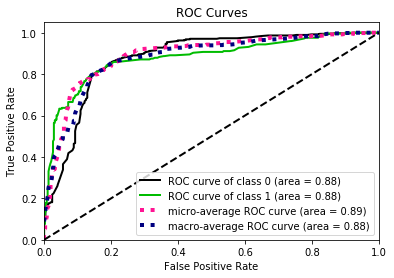

Confusion Matrix y_hat
----------------------
[[160  14]
 [ 29  65]]


C:\Users\agus_\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


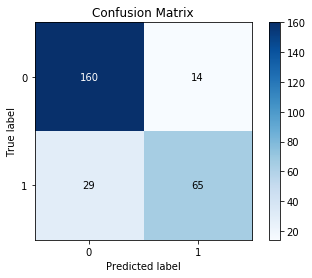

In [77]:
# Cálculo de la matriz de probabilidades para SVM con datos normalizados
y_hat_proba = svc.predict_proba(X_train_norm)
print("El área bajo la curva es:", metrics.roc_auc_score(y_true=y_test, y_score=y_hat))
print("\n")
# Reporte de clasificación (precision, recall, f1-score y support)
print(metrics.classification_report(y_test, y_hat, target_names=['Not Survived', 'Survived']))
skplt.metrics.plot_roc(y_train, y_hat_proba) # gráfico
plt.show()
print("Confusion Matrix y_hat")
print("----------------------")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_hat, labels=[0,1]))
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_hat, labels=[0,1])
plt.show()

In [78]:
# Randon Forest con normalización de datos
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train_norm, y_train)
y_hat = random_forest.predict(X_test_norm)
acc_random_forest = round(random_forest.score(X_train_norm, y_train) * 100, 2)
print("Tasa de aciertos para Random Forest con normalización de datos" , acc_random_forest)

Tasa de aciertos para Random Forest con normalización de datos 88.12


El área bajo la curva es: 0.8086940572267057


              precision    recall  f1-score   support

Not Survived       0.87      0.86      0.86       174
    Survived       0.75      0.76      0.75        94

 avg / total       0.83      0.82      0.82       268



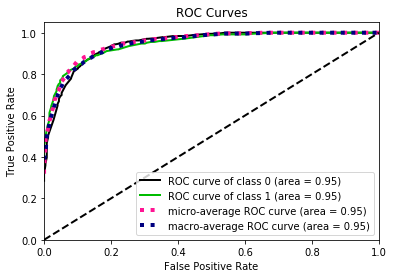

Confusion Matrix y_hat
----------------------
[[150  24]
 [ 23  71]]


C:\Users\agus_\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


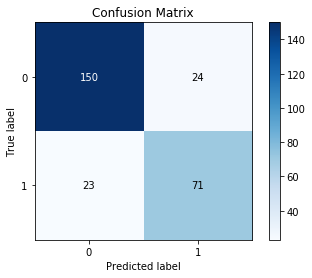

In [79]:
# Cálculo de la matriz de probabilidades para Random Forest con datos normalizados
y_hat_proba = random_forest.predict_proba(X_train_norm)
print("El área bajo la curva es:", metrics.roc_auc_score(y_true=y_test, y_score=y_hat))
print("\n")
# Reporte de clasificación (precision, recall, f1-score y support)
print(metrics.classification_report(y_test, y_hat, target_names=['Not Survived', 'Survived']))
skplt.metrics.plot_roc(y_train, y_hat_proba) # gráfico
plt.show()
print("Confusion Matrix y_hat")
print("----------------------")
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_hat, labels=[0,1]))
skplt.metrics.plot_confusion_matrix(y_true=y_test, y_pred=y_hat, labels=[0,1])
plt.show()

#### Resultados para subir al Kaggle

In [80]:
ids = data_test['PassengerId']
predictions = random_forest.predict(data_test.drop('PassengerId', axis=1))

output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
# Convierte la salida en un archivo .csv
# output.to_csv('titanic-predictions.csv', index = False) 
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


LINK PARA VER LOS RESULTADOS:
https://www.kaggle.com/c/titanic/leaderboard

## 5. Principal Components Analysis

In [81]:
pca = PCA(n_components=7)

# Antes de transformar los datos, los mismos deben estar normalizados
# scale() estandariza los datos con respecto a la media 0 y a la desv. estándar 1 (z-score)

X_scaled = scale(X)
pca.fit(X_scaled)
# X_transformed son los datos X transformados linealmente con respecto a los componentes principales
X_transformed = pca.transform(X_scaled)

In [82]:
# Veamos los vectores de componentes de PCA...
print('Componentes de PCA (ordenados desc. desde el 1° hasta el 7° vector): \n\n', pca.components_)
print("\n")
# Notar que, por la restricción de la ortogonalidad, la máxima
# cantidad de componentes principales es la de los features de X
print('Varianza explicada por cada componente: \n\n', pca.explained_variance_)

Componentes de PCA (ordenados desc. desde el 1° hasta el 7° vector): 

 [[-0.30524977 -0.15622466  0.47956492  0.15266275 -0.46140378  0.46133352
  -0.45100549]
 [-0.56505439  0.54904676  0.39298921  0.13063548  0.40487961 -0.20748279
   0.02790065]
 [ 0.02642393  0.07798955 -0.21406029  0.90457787 -0.08195916  0.17900122
   0.30062889]
 [-0.12285343  0.44788166 -0.15441743 -0.3680934  -0.2485968   0.57523495
   0.48195015]
 [ 0.46283275  0.57493159 -0.16101223  0.06776709  0.15256117  0.21624901
  -0.59555323]
 [ 0.18816149  0.3683566   0.16871452  0.02291839 -0.69752187 -0.55421676
   0.07890409]
 [ 0.56756147 -0.03504634  0.70108551  0.02751277  0.21177752  0.16512341
   0.33504094]]


Varianza explicada por cada componente: 

 [2.40790913 1.80327293 0.97554003 0.83433086 0.58558363 0.23353674
 0.16769184]


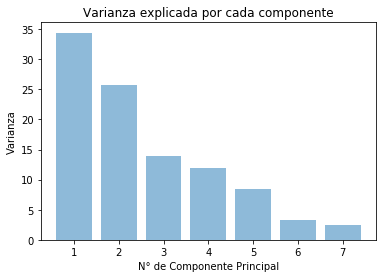

In [83]:
# Visualizamos ahora cuánto es explicada la varianza
# por cada uno de los componentes principales
y_pos = np.arange(7)
# pca.explained_variance_ratio_ es quien nos devuelve el gráfico de la varianza
plt.bar(y_pos, np.round(100 * pca.explained_variance_ratio_, decimals=1), align='center', alpha=0.5)
plt.xticks(y_pos, [1, 2, 3, 4, 5, 6, 7])
plt.xlabel('N° de Componente Principal')
plt.ylabel('Varianza')
plt.title('Varianza explicada por cada componente')
plt.show()

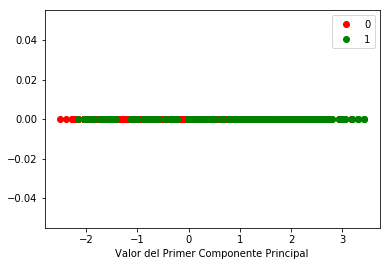

In [84]:
plt.plot(X_transformed[y==0, 0], np.zeros(len(X_transformed[y==0, 0])), 'o', label=0, color='red')
plt.plot(X_transformed[y==1, 0], np.zeros(len(X_transformed[y==1, 0])), 'o', label=1, color='green')
plt.xlabel('Valor del Primer Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

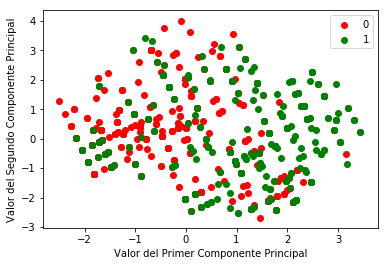

In [85]:
# Incluimos el segundo componente principal
plot = plt.scatter(X_transformed[y==0, 0], X_transformed[y==0, 1], label=y[0], color='red')
plot = plt.scatter(X_transformed[y==1, 0], X_transformed[y==1, 1], label=y[1], color='green')

plt.xlabel('Valor del Primer Componente Principal')
plt.ylabel('Valor del Segundo Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

In [86]:
# código agregado para graficar los vectores
V = np.array([[pca.components_[0,0],pca.components_[1,0]],
              [pca.components_[0,1],pca.components_[1,1]],
              [pca.components_[0,2],pca.components_[1,2]],
              [pca.components_[0,3],pca.components_[1,3]],
              [pca.components_[0,4],pca.components_[1,4]],
              [pca.components_[0,5],pca.components_[1,5]],
              [pca.components_[0,6],pca.components_[1,6]]])
origin = [0], [0] # origin point

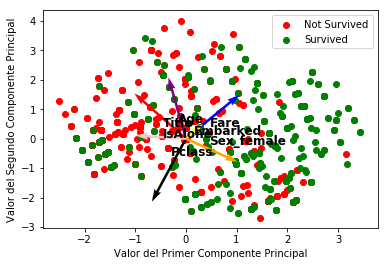

In [87]:
plot = plt.scatter(X_transformed[y==0, 0], X_transformed[y==0, 1], label='Not Survived', color='red')
plot = plt.scatter(X_transformed[y==1, 0], X_transformed[y==1, 1], label='Survived', color='green')

# notar que los vectores están agrandados a modo de mejor visualización
plt.quiver(*origin, V[:,0], V[:,1], color=['black','purple','blue','yellow','red','orange','pink'], scale=3)

plt.text(pca.components_[0,0],pca.components_[1,0], data_train.columns[1], fontsize=12, weight=1000)
plt.text(pca.components_[0,1],pca.components_[1,1], data_train.columns[2], fontsize=12, weight=1000)
plt.text(pca.components_[0,2],pca.components_[1,2], data_train.columns[3], fontsize=12, weight=1000)
plt.text(pca.components_[0,3],pca.components_[1,3], data_train.columns[4], fontsize=12, weight=1000)
plt.text(pca.components_[0,4],pca.components_[1,4], data_train.columns[5], fontsize=12, weight=1000)
plt.text(pca.components_[0,5],pca.components_[1,5], data_train.columns[6], fontsize=12, weight=1000)
plt.text(pca.components_[0,6],pca.components_[1,6], data_train.columns[7], fontsize=12, weight=1000)
plt.xlabel('Valor del Primer Componente Principal')
plt.ylabel('Valor del Segundo Componente Principal')
plt.legend(loc='best', numpoints=1)
plt.show()

### PCA y Random Forest

In [88]:
# PCA con Random Forest
X_train_PCA, X_test, y_train, y_test = train_test_split(X_transformed, y, random_state=10, test_size=0.3)

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train_PCA, y_train)
y_hat = random_forest.predict(X_test_norm)
acc_random_forest = round(random_forest.score(X_train_PCA, y_train) * 100, 2)
print("Tasa de aciertos para Random Forest con PCA" , acc_random_forest)

Tasa de aciertos para Random Forest con PCA 88.12


## 6. Conclusión y cierre
No se justifica realizar la reducción de dimensionalidad de los features con PCA, ya que la varianza de cada componente que generamos no varía en gran medida entre ellos y para llegar a un 80 % de la varianza de los datos se necesitan como mínimo 5 componentes de 7 que se generan.

Por otro lado, al aplicar PCA en uno de los clasificadores notamos que disminuye la tasa de aciertos. Esta es otra de las cuales no se justifica aplicar PCA.